# Linear Regression From Scratch

Author: **Marcin Sikorski**<br>
Date: December, 2024

A simple demonstration of a linear regression solution built from scratch, without using advanced frameworks. We will develop a basic regression model and compare its evaluation results with those from the LinearRegression method in scikit-learn.

### Generating Data

To perform linear regression, we need to generate some random training data while maintaining linearity. When the function is of only one variable, it is of the form:

$$ f(y) = ax + b$$ or $$y = mx + c,$$

where $m$ is the slope and $c$ is the intercept (or bias). Both are constants and describe the direction of the line on a plane. These are the parameters to be learned by the regression model.

The idea of linear regression is to fit a line to scattered data points in such a way that it minimizes the difference between the observed data and the predicted values, a line that will best describe the relationship. It returns the new values of $m$ and $c$.

In [1]:
import numpy as np
np.random.seed(42)

# intialize arbitrary slope & intercept
m = 2
c = 11

# number of instances (data points)
N = 120

# generate x values
x = np.arange(0, N)

# normalize x values to the range [0, 1] for stability
x = (x - np.min(x)) / (np.max(x) - np.min(x))

# generate values with noise
noise = 0.8
y = m * x + c + noise * np.random.rand(N)

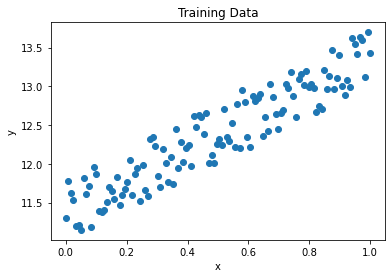

In [2]:
import matplotlib.pyplot as plt

# display training data
plt.scatter(x, y)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Learning the Slope and Intercept

The steps for performing linear regression are as follows:
1. Initialization: We begin by initializing the parameters, $m_{1}$ (slope) and $c_{1}$ (intercept), with random values (close to 1.0).
2. Gradient Descent: In each subsequent iteration, these parameters will be optimized using gradient descent. The goal is to find the minimum of the cost function, which represents the difference between the predicted and actual values. The gradient of the linear function is a vector that contains the partial derivatives with respect to both $m_{1}$ and $c_{1}$. Each iteration updates the parameters by moving them in the opposite direction of their respective gradients (subtracting them), effectively reducing (or minimizing) the error:

$$x_{new} = x_{old} - \text{error} = x_{old} - \eta\nabla f(x) = x_{old} - \eta \left(\frac{∂f}{∂m_{1}}, \frac{∂f}{∂c_{1}}\right),$$

where $\eta$ is the learning rate (typically 0.001 or 0.01) and $\nabla f(x)$ is the gradient vector.
3. Cost Function & Partial Derivatives: For linear regression we commonly use mean squared error (or MSE) as a cost function:

$$MSE = \frac{1}{N} \sum_{i=1}^{N}(y_{i} - \hat{y_{i}})^2.$$

The partial derivatives of the cost function with respect to the approximated parameters (slope and intercept) are given by:

$$\frac{∂MSE}{∂m_{1}} = -\frac{2}{N} \sum_{i=1}^{N} - x_{i}(y_{i} - \hat{y_{i}}) = -\frac{2}{N} \sum_{i=1}^{N} - x_{i}(y_{i} - (m_{1}x_{i} + c_{1})),$$

$$\frac{∂MSE}{∂c_{1}} = -\frac{2}{N} \sum_{i=1}^{N} - (y_{i} - \hat{y_{i}}) = -\frac{2}{N} \sum_{i=1}^{N} - (y_{i} - (m_{1}x_{i} + c_{1})),$$

where $y_{i}$ is the true or actual value, $\hat{y_{i}}$ is the estimated value, and $N$ is the number of data points (instances). These gradients are then used to update the parameters $m_{1}$ and $c_{1}$ in gradient descent:

$$m_{new} = m_{1} - \eta \frac{∂MSE}{∂m_{1}},$$

$$c_{new} = c_{1} - \eta \frac{∂MSE}{∂c_{1}}.$$

Even with a smaller learning rate, the gradients might still explode if they become too large during the update. Gradient clipping can help by limiting the magnitude of the gradients before applying the update.
4. Convergence: We repeat until the updates to $m_{1}$ and $c_{1}$ become negligible (i.e., the change in values is very small), indicating that the parameters have converged to their optimal values.
5. Evaluation: The performance of the model is evaluated using basic metrics. Finally, we will train scikit-learn's LinearRegression model on the same data points and compare the results.

In [3]:
# evaluation metrics
def compute_metrics(y_true, y_pred):
    # mean squared error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)
    
    # mean absolute error (MAE)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # R-squared (R²)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    return mse, mae, r2

Iteration 500:
	MSE = 0.224334, MAE = 0.396816, R² = 0.454110
		y = 3.444823 x + 10.609166


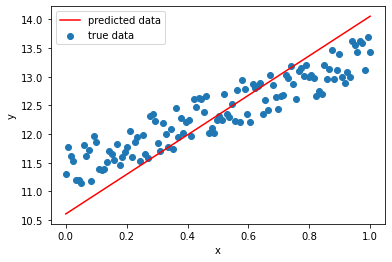

Iteration 1000:
	MSE = 0.100272, MAE = 0.255797, R² = 0.756000
		y = 2.762880 x + 10.974591


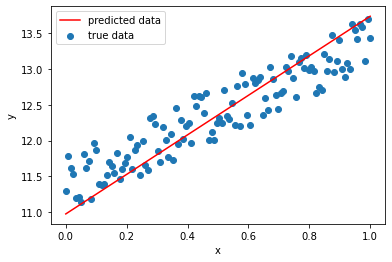

Iteration 1500:
	MSE = 0.067705, MAE = 0.218407, R² = 0.835247
		y = 2.413479 x + 11.161804


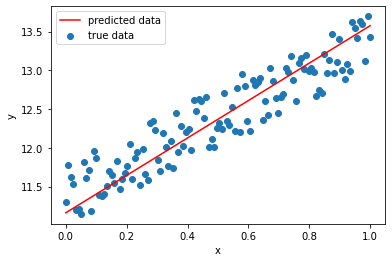

Iteration 2000:
	MSE = 0.059157, MAE = 0.210831, R² = 0.856050
		y = 2.234463 x + 11.257722


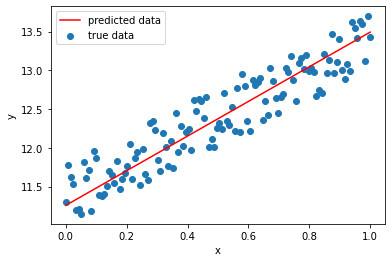

Iteration 2500:
	MSE = 0.056912, MAE = 0.208575, R² = 0.861510
		y = 2.142744 x + 11.306865


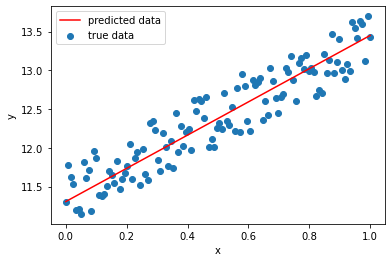

Iteration 3000:
	MSE = 0.056323, MAE = 0.208153, R² = 0.862944
		y = 2.095752 x + 11.332044


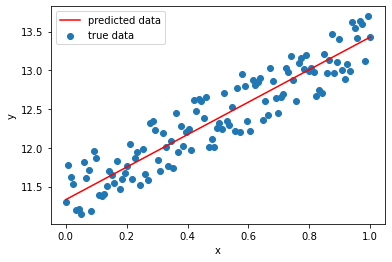

Iteration 3500:
	MSE = 0.056169, MAE = 0.208270, R² = 0.863320
		y = 2.071675 x + 11.344945


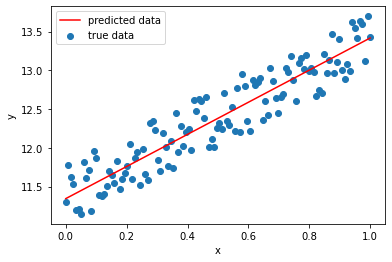

Iteration 4000:
	MSE = 0.056128, MAE = 0.208396, R² = 0.863419
		y = 2.059340 x + 11.351554


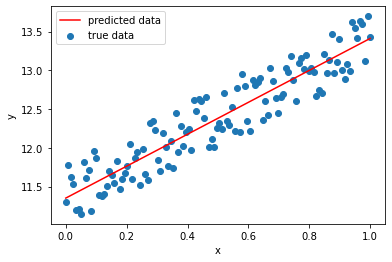

Iteration 4500:
	MSE = 0.056117, MAE = 0.208474, R² = 0.863445
		y = 2.053019 x + 11.354941


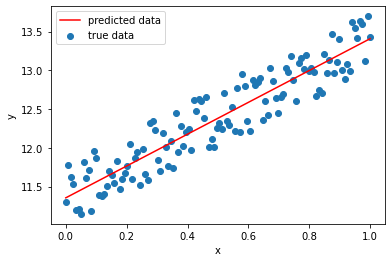

Iteration 5000:
	MSE = 0.056115, MAE = 0.208526, R² = 0.863452
		y = 2.049781 x + 11.356676


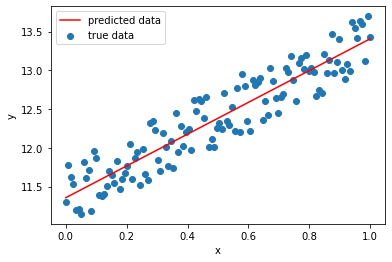

Iteration 5500:
	MSE = 0.056114, MAE = 0.208552, R² = 0.863454
		y = 2.048122 x + 11.357565


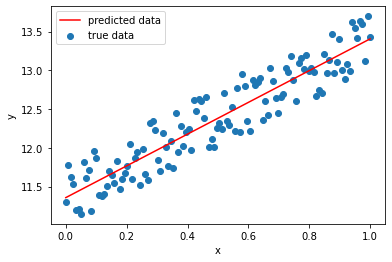

Iteration 6000:
	MSE = 0.056114, MAE = 0.208566, R² = 0.863454
		y = 2.047272 x + 11.358020


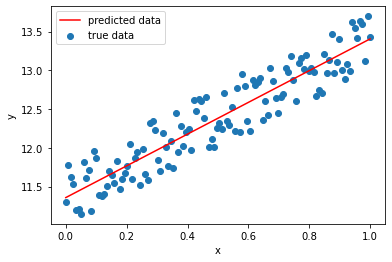

Iteration 6500:
	MSE = 0.056114, MAE = 0.208572, R² = 0.863454
		y = 2.046837 x + 11.358253


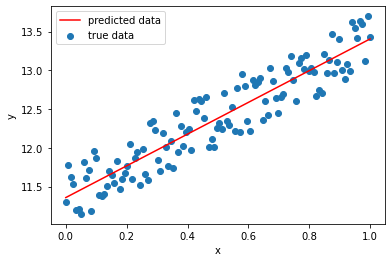

Iteration 7000:
	MSE = 0.056114, MAE = 0.208576, R² = 0.863454
		y = 2.046613 x + 11.358373


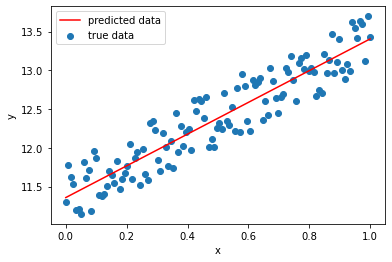

Iteration 7500:
	MSE = 0.056114, MAE = 0.208578, R² = 0.863454
		y = 2.046499 x + 11.358434


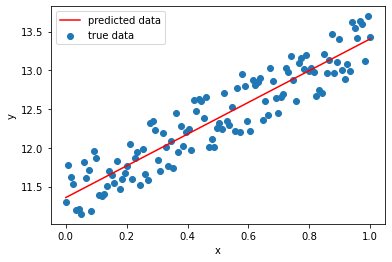

Iteration 8000:
	MSE = 0.056114, MAE = 0.208579, R² = 0.863454
		y = 2.046441 x + 11.358466


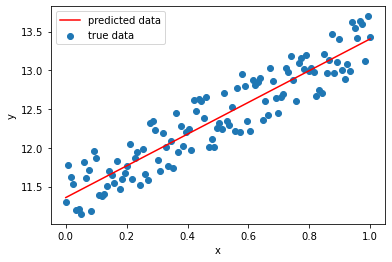

In [4]:
# initialize new slope & intercept
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# hyperparameters: learning rate & number of iterations
learning_rate = 0.01
num_iter = 8_000

for i in range(num_iter):
    y_hat = m1 * x + c1
    
    # cost function's gradient (partial derivatives)
    dm = -(2.0 / N) * np.sum(np.multiply(x, (y - y_hat)))
    dc = -(2.0 / N) * np.sum(y - y_hat)
    
    # gradient clipping to avoid overflow (prevent updates from getting too large)
    dm = np.clip(dm, -1e5, 1e5)
    dc = np.clip(dc, -1e5, 1e5)

    # update parameters
    m1 = m1 - learning_rate * dm
    c1 = c1 - learning_rate * dc
    
    # display progress every n iterations
    if (i + 1) % 500 == 0:
        y_pred = m1 * x + c1
        mse, mae, r2 = compute_metrics(y, y_pred)
        
        print(f"Iteration {i + 1}:")
        print(f"\tMSE = {mse:.6f}, MAE = {mae:.6f}, R² = {r2:.6f}")
        print(f"\t\ty = {m1[0]:.6f} x + {c1[0]:.6f}")
        
        plt.scatter(x, y, label='true data')
        plt.plot(x, m1 * x + c1, color='r', label='predicted data')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

With each iteration the trend line gradually fits better to the scatter points. The new $m$ and $c$ are close to the provided values.

### Scikit-Learn Model

Now, we will use scikit-learn's LinearRegression method to fit the same data and compare the results with previous version.

Linear Regression from sklearn:
	MSE = 0.056114, MAE = 0.208580, R² = 0.863454
		y = 2.046379 x + 11.358499


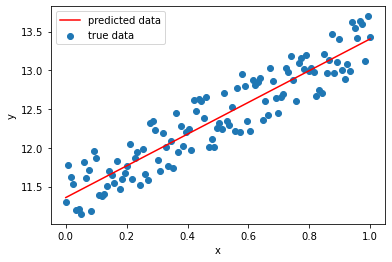

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg = LinearRegression()

# fit the model
# reshape x to (N, 1)
reg.fit(x.reshape(-1, 1), y)

# predictions
y_pred_sk = reg.predict(x.reshape(-1, 1))

# compute the metrics
mse_sk = mean_squared_error(y, y_pred_sk)
mae_sk = mean_absolute_error(y, y_pred_sk)
r2_sk = r2_score(y, y_pred_sk)

print('Linear Regression from sklearn:')
print(f"\tMSE = {mse_sk:.6f}, MAE = {mae_sk:.6f}, R² = {r2_sk:.6f}")
print(f"\t\ty = {reg.coef_[0]:.6f} x + {reg.intercept_:.6f}")

plt.scatter(x, y, label='true data')
plt.plot(x, y_pred_sk, color='r', label='predicted data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
from prettytable import PrettyTable

table = PrettyTable(['Model', 'MSE', 'MAE', 'R²', 'm (slope)', 'c (intercept)'], align='c')
table.add_row([
    'From scratch',
    round(mse, 6),
    round(mae, 6),
    round(r2, 6),
    round(m1[0], 6),
    round(c1[0], 6)
])
table.add_row([
    'From sklearn',
    round(mse_sk, 6),
    round(mae_sk, 6),
    round(r2_sk, 6),
    round(reg.coef_[0], 6),
    round(reg.intercept_, 6)
])
print(table)

+--------------+----------+----------+----------+-----------+---------------+
|    Model     |   MSE    |   MAE    |    R²    | m (slope) | c (intercept) |
+--------------+----------+----------+----------+-----------+---------------+
| From scratch | 0.056114 | 0.208579 | 0.863454 |  2.046441 |   11.358466   |
| From sklearn | 0.056114 | 0.20858  | 0.863454 |  2.046379 |   11.358499   |
+--------------+----------+----------+----------+-----------+---------------+


It can be deduced from the above results that our custom-developed model performs as accurately as the scikit-learn model, with only minimal differences in $m$ and $c$. The differences in the learned parameters are so small that they are practically insignificant. The evaluation metrics are the same. Our custom model is a valid and accurate alternative to the scikit-learn model, with virtually no noticeable difference in performance or output.